# Introduction

This is my first work of machine learning.

- Origin data called: `train_df_org`, `test_df_org`
- Processing data called: `train_df`, `test_df`, `full_df`
- Data after clean called: `train_df_clean`, `test_df_clean`
- Train data will be splitted 2 set called : `train_df_train`, `train_df_test` 
- Data value called: `train_df_val`, `test_df_val`


# Preparing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
# Read data
train_df_org = pd.read_csv('../input/train.csv', header = 0)
test_df_org = pd.read_csv('../input/test.csv' , header = 0)
# Tmp data
train_df = train_df_org.copy()
test_df  = test_df_org.copy()
full_df = [train_df, test_df]
# Data info
print (train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


# Feature statistics

In [2]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [3]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [4]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [5]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


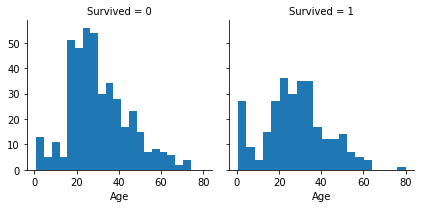

In [6]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

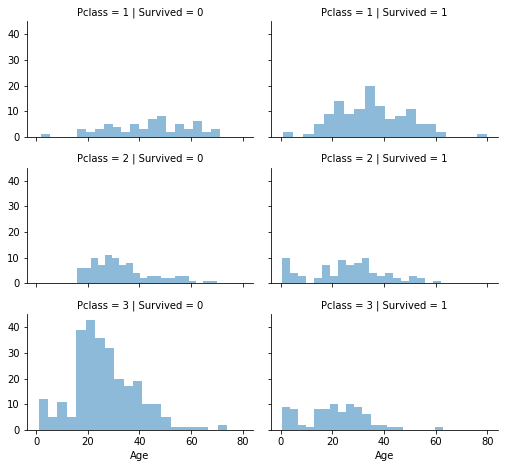

In [7]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

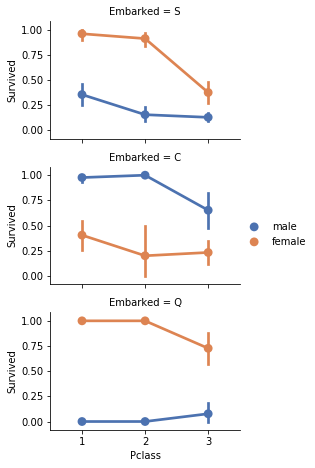

In [8]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

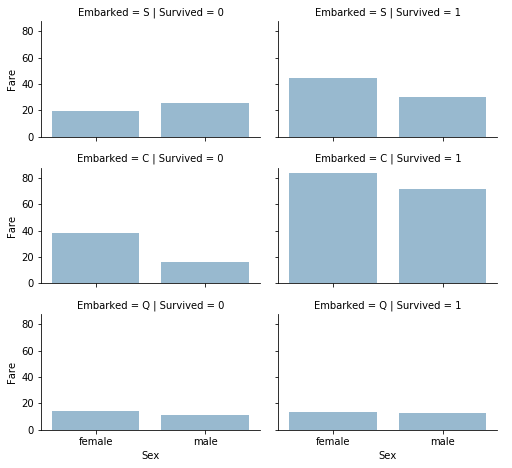

In [9]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

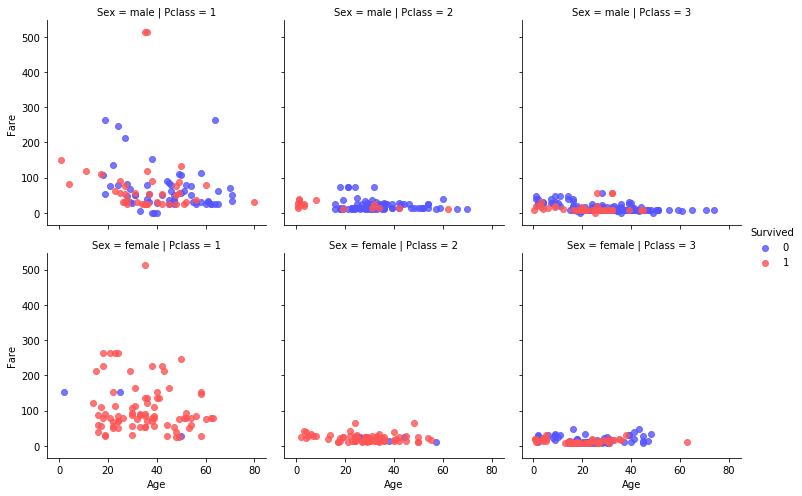

In [10]:
grid = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'Age', 'Fare', alpha=0.8)
grid.add_legend()

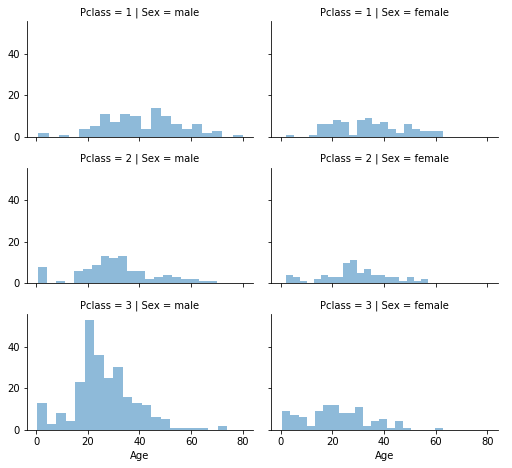

In [11]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

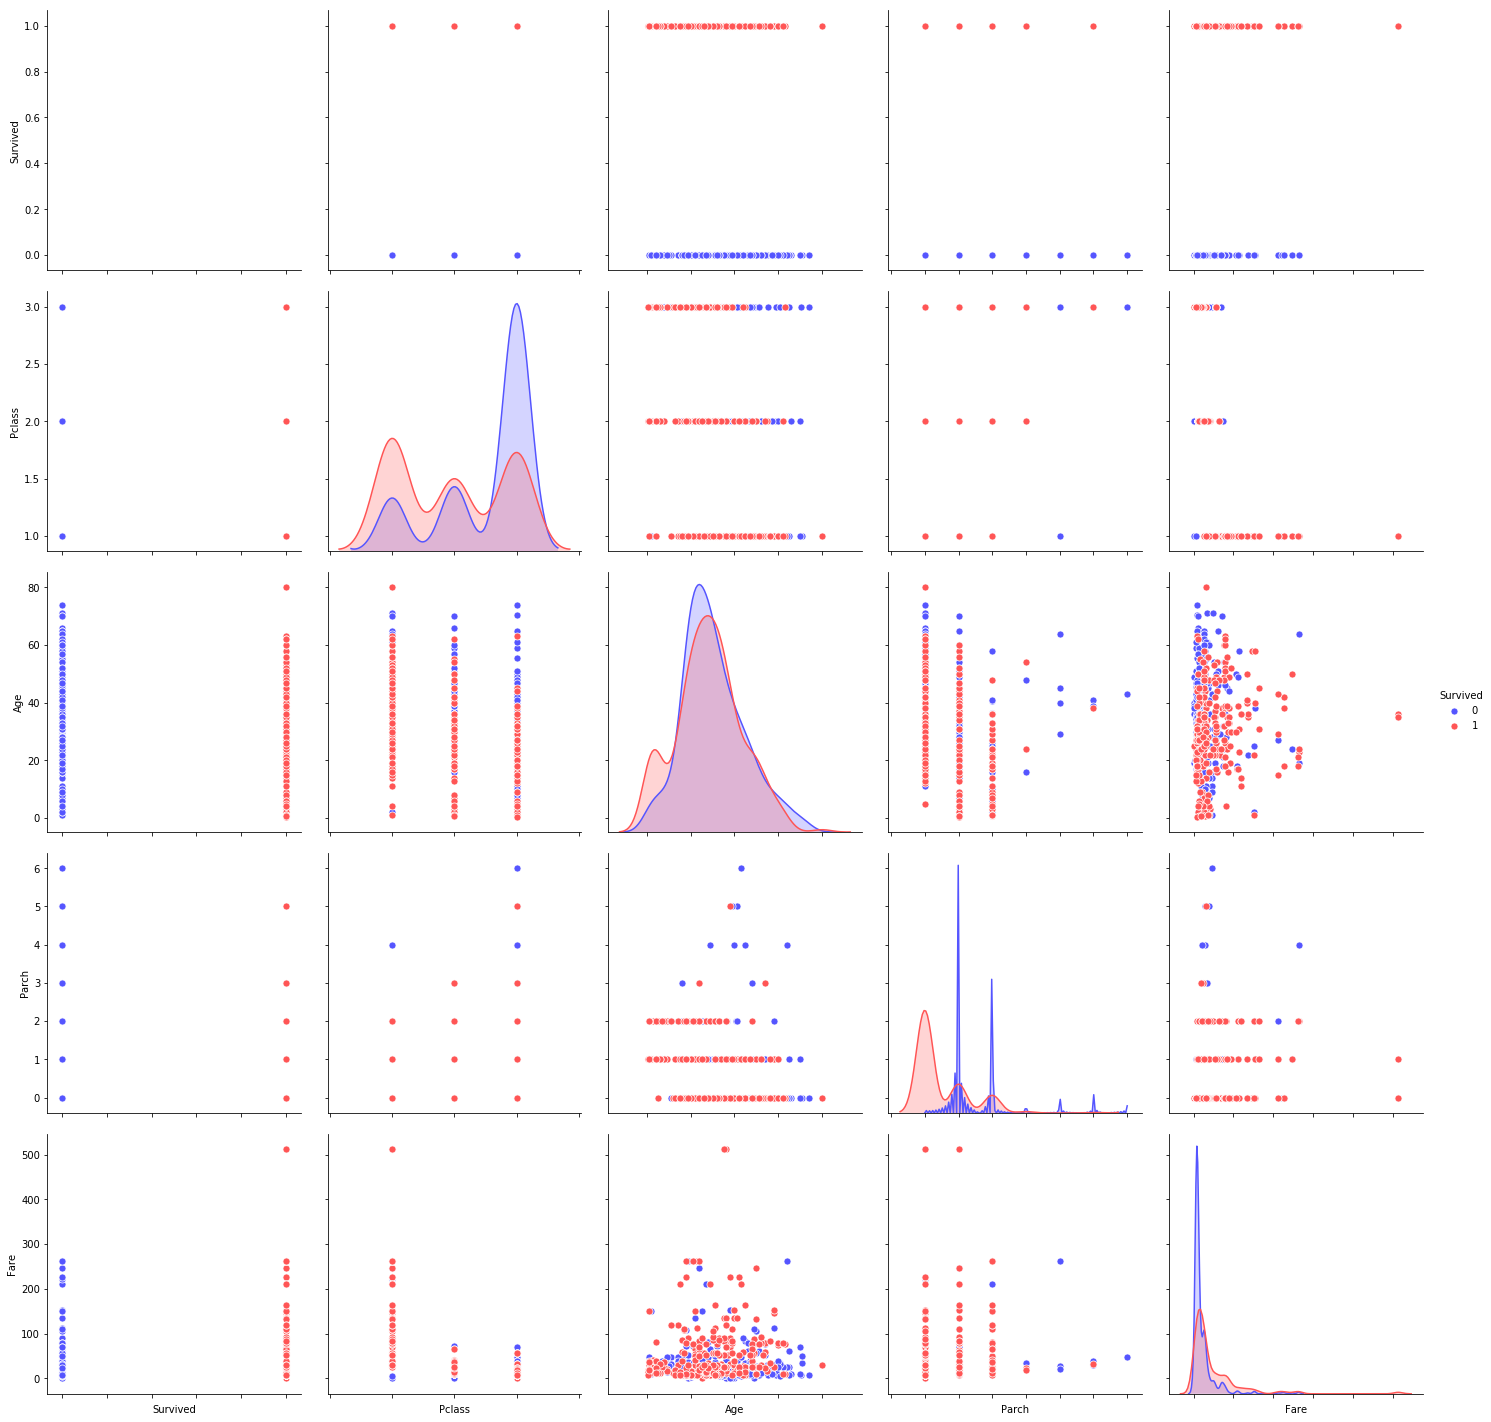

In [12]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic',
                 size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])

# Preprocess data

## Data cleaning

In [13]:
# SibSp and Parch
"""
With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.
"""
for dataset in full_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

"""
It seems has a good effect on our prediction but let's go further and categorize people to check whether they are alone in this ship or not.
"""
for dataset in full_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [14]:
# Embarked
"""
the embarked feature has some missing value. and we try to fill those with the most occurred value ( 'S' ).
"""
for dataset in full_df:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [15]:
# Fare
"""
Fare also has some missing value and we will replace it with the median. then we categorize it into 4 ranges.
"""
for dataset in full_df:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [16]:
# Age
for dataset in full_df:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

print (train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.504425
1   (16.0, 32.0]  0.351724
2   (32.0, 48.0]  0.384030
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [17]:
# Title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_df:
    dataset['Title'] = dataset['Name'].apply(get_title)

pd.crosstab(train_df['Title'], train_df['Sex'])

for dataset in full_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [18]:
for dataset in full_df:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4


## Feature selection

In [19]:
"Before", train_df.shape, test_df.shape, full_df[0].shape, full_df[1].shape

('Before', (891, 17), (418, 14), (891, 17), (418, 14))

In [20]:
# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train_df_clean = train_df.drop(drop_elements, axis = 1)
train_df_clean = train_df_clean.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test_df_clean  = test_df.drop(drop_elements, axis = 1)

print (train_df_clean.head(10))

train_df_val = train_df_clean.values
test_df_val  = test_df_clean.values

   Survived  Pclass  Sex  Age  Fare  Embarked  FamilySize  IsAlone  Title
0         0       3    1    1     0         0           2        0      1
1         1       1    0    2     3         1           2        0      3
2         1       3    0    1     1         0           1        1      2
3         1       1    0    2     3         0           2        0      3
4         0       3    1    2     1         0           1        1      1
5         0       3    1    2     1         2           1        1      1
6         0       1    1    3     3         0           1        1      1
7         0       3    1    0     2         0           5        0      4
8         1       3    0    1     1         0           3        0      3
9         1       2    0    0     2         1           2        0      3


In [21]:
"After", train_df_clean.shape, test_df_clean.shape, full_df[0].shape, full_df[1].shape

('After', (891, 9), (418, 8), (891, 17), (418, 14))

# Machine learning

Now we are ready to train a model and predict the required solution.

- KNN or k-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifier
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- Naive Bayes Classifier
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Logistic Regession
- Perceptron
- Stochastic Gradient Descent

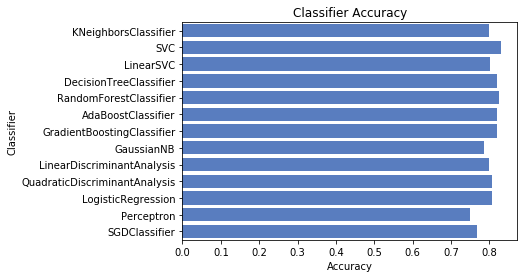

In [22]:
# Import ml model lib
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    SVC(probability=True, gamma='scale'),
    LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver = 'lbfgs'),
    Perceptron(),
    SGDClassifier(),
]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

# Config data for classifiers
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_df_val[0::, 1::]
Y = train_df_val[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(Y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

# Show plot
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")


**Select candidate model**

In [23]:
models_score = pd.DataFrame({
    'Model': list(acc_dict.keys()),
    'Score': list(acc_dict.values())}).sort_values(by='Score', ascending=False)
print(models_score)

                            Model     Score
1                             SVC  0.831111
4          RandomForestClassifier  0.824444
3          DecisionTreeClassifier  0.821111
5              AdaBoostClassifier  0.818889
6      GradientBoostingClassifier  0.818889
10             LogisticRegression  0.807778
9   QuadraticDiscriminantAnalysis  0.805556
2                       LinearSVC  0.802222
0            KNeighborsClassifier  0.800000
8      LinearDiscriminantAnalysis  0.798889
7                      GaussianNB  0.785556
12                  SGDClassifier  0.766667
11                     Perceptron  0.750000


# Prediction

In [24]:
candidate_classifier = classifiers[models_score.head(1).index[0]]
print('Candidate classifier: ', candidate_classifier)
candidate_classifier.fit(X, Y)
predict_res = candidate_classifier.predict(test_df_clean)
print('Predict result: ', predict_res)

Candidate classifier:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predict result:  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1

# Export submission

In [25]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict_res
    })
submission.to_csv('../output/export_submission.csv', index=False)
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
